How can we tell when our systems are equilibrated?

What does it mean for samples to be independent?

Fourier transform:
    - https://www.youtube.com/watch?v=spUNpyF58BY
    - https://en.wikipedia.org/wiki/Fourier_transform

Autocorrelation:
    - https://en.wikipedia.org/wiki/Autocorrelation 



In this exercise we're going to build our understanding of independent sampling from the bottom up.:
- Decorrelation times come from an autocorrelation function
- Autocorrelations functions are best calculated with a discrete Fourier transform
- Discrete Fourier transforms are fast and easy

In [1]:
import numpy
import matplotlib.pyplot as plt


In [ ]:
# Imaginary numbers in python

# The number 1j = 1*sqrt(-1), and can be used to make complex numbers
# exp(1j*x) = cos(x) = j*sin(x)

#try it out for yourself:
x = 
print(numpy.exp(1j*x))
print("({},{}j)".format(numpy.cos(x), numpy.sin(x)))


In [ ]:
# The discrete Fourier transform is a sum of complex numbers:
#data = numpy.array([ fill,in,the,blanks,please]) #play around with some other arrays
data = numpy.array([ 7,1,2,4,4]) #play around with some other arrays
n = len(data)
mydft = []
for k in range(n):
    s = 0
    for m in range(n):
        s += data[m]*numpy.exp(2j*numpy.pi*k*m/n)
    mydft.append(s)
mydft = numpy.array(mydft)
fastdft = numpy.fft.fft(data)

print(mydft)
print(fastdft) #note that this implementation will be *much* faster for larger array sizes

In [ ]:
#Notice anything about the results of the fft above?
#There are some patterns in the numbers- some elements are complex conjugates of each other.
#This is because our input array is *real* - it has zeros for all of its imaginary compontents
#An all-real dataset imposes *symmetry* constraints on the output of the FFT
#We'll be able to see this when we multiply the FFT by its complex conjugate:
power = mydft*numpy.conjugate(mydft)
plt.plot(power[?::]) #try out excluding the first element


In [ ]:
# Let's take a closer look at this variable "power":
# we got it by multiplying the FFT(data) by its complex conjugate
# resulting in a real-valued array
# This array indicates how much each of the harmonics matters when 
# representing our data as a sum of cosines and sines
# The 0th element should just be the sum of the data squared
# the 1st encodes for the first harmonic
# the 2nd encodes for the second harmonic
# ..etc
# except that the data after the symmetry point is redundant

plt.plot(power)

In [ ]:
# Fourier transforms of real inputs and their inverses can exploit
# this symmetry to take up less space and be faster, so we'll use those here.
# Here's the same example as above, but with numpy's real dft
# Notice the main difference is that the redundant pieces are omitted. 

ft = numpy.fft.rfft(data)
plt.plot(ft*numpy.conjugate(ft))



In [ ]:
#OK! So we've got all of the pieces to write our own autocorrelation function:

def autocorr(d):
    #subtract the average of d from itself
    #store the real fast fourier transform of d in a variable ft
    #multiply ft by its complex conjugate, and take the inverse real FFT of that product
    #normalize this by the length and the variance of d
    #return this array, possibly cutting out any redundant data
    

In [ ]:
xmax = 10000000
n = 10000
x = numpy.linspace(0,xmax,n)
data = 27 * numpy.cos(x/(10*n)) + numpy.sin(x/(2*n))
# How many frequencies matter in this dataset? Let's explore with FFT's

In [ ]:
data = 27 * numpy.exp(-x/(10*n))+rng.standard_normal(len(x)) -442.31
# What is the decorrelation time of this dataset?


In [ ]:
# How many independent samples are in it?

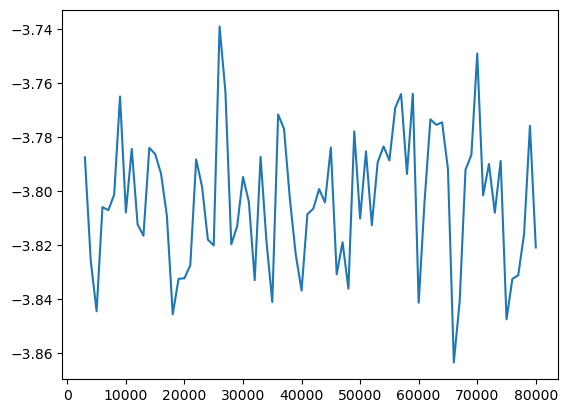

In [2]:
#now let's figure out how many independent samples are in a trajectory from Amir's example
thermo = numpy.loadtxt("thermo.txt",skiprows=4)
t = thermo[:,0]
pe = thermo[:,1]
plt.plot(t,pe)